In [1]:
# Run the dataprocessing file(s) first

import csv
import pandas
import pyspedas
from pyspedas import time_double
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

# Download the .csv file from SuperMAG at https://supermag.jhuapl.edu/substorms/ (an account is required, just make it anonymous), rename it to "substormdata.csv"
# Use the following for Linux/Mac:
datadirectory=os.path.expanduser('~')+'/Downloads/Data/' # The ending forward slash is necessary
# Use the following for Windows:
#datadirectory=os.path.join(os.path.join(os.environ['USERPROFILE']),'Downloads\\Data\\') # The two ending back slashes are necessary

# It may be necessary to use a conversion factor on some of these parameters, example:
tempconversionfactor=8.61732814974493*1e-5 # for K to eV in temperature

substormfile=datadirectory+'substormdata.csv'
with open(substormfile,'r') as csv_file:
    csv_reader=csv.reader(csv_file)
substormdata=pandas.read_csv(substormfile)
substormtime=substormdata.iloc[0:len(substormdata),0]
subtrange=time_double(substormtime)

# Requires the use of omnisave.ipynb first
# For more info on these parameters, visit https://cdaweb.gsfc.nasa.gov/misc/NotesO.html#OMNI_HRO2_1MIN
loadedarrays=np.load(datadirectory+'myomnidata.npz')
bxtimes=loadedarrays['arr_0']
imfvalues=loadedarrays['arr_1']
plsvalues=loadedarrays['arr_2']
imfptsvalues=loadedarrays['arr_3']
plsptsvalues=loadedarrays['arr_4']
percinterpvalues=loadedarrays['arr_5']
timeshiftvalues=loadedarrays['arr_6']
rmstimeshiftvalues=loadedarrays['arr_7']
rmsphasevalues=loadedarrays['arr_8']
timebtwnobsvalues=loadedarrays['arr_9']
bmagvalues=loadedarrays['arr_10']
bxvalues=loadedarrays['arr_11']
byvalues=loadedarrays['arr_12']
bzvalues=loadedarrays['arr_13']
bygsmvalues=loadedarrays['arr_14']
bzgsmvalues=loadedarrays['arr_15']
rmssdbvalues=loadedarrays['arr_16']
rmssdfldvecvalues=loadedarrays['arr_17']
speedvalues=loadedarrays['arr_18']
vxvalues=loadedarrays['arr_19']
vyvalues=loadedarrays['arr_20']
vzvalues=loadedarrays['arr_21']
protondenvalues=loadedarrays['arr_22']
temperaturevalues=loadedarrays['arr_23']*tempconversionfactor
alpharatiovalues=loadedarrays['arr_24']
flowpressurevalues=loadedarrays['arr_25']
efieldmeasuredvalues=loadedarrays['arr_26']
betavalues=loadedarrays['arr_27']
alfmachvalues=loadedarrays['arr_28']
magmachvalues=loadedarrays['arr_29']
xposvalues=loadedarrays['arr_30']
yposvalues=loadedarrays['arr_31']
zposvalues=loadedarrays['arr_32']
bowshockxvalues=loadedarrays['arr_33']
bowshockyvalues=loadedarrays['arr_34']
bowshockzvalues=loadedarrays['arr_35']
aeindexvalues=loadedarrays['arr_36']
alindexvalues=loadedarrays['arr_37']
auindexvalues=loadedarrays['arr_38']
symdvalues=loadedarrays['arr_39']
symhvalues=loadedarrays['arr_40']
asydvalues=loadedarrays['arr_41']
asyhvalues=loadedarrays['arr_42']

# Add any derived parameters, take note of units
efieldxgsecalculatedvalues=1e3*1e3*1e-9*(vzvalues*byvalues-vyvalues*bzvalues) # values are in mV/m
efieldygsecalculatedvalues=1e3*1e3*1e-9*(vxvalues*bzvalues-vzvalues*bxvalues) # values are in mV/m
efieldzgsecalculatedvalues=1e3*1e3*1e-9*(vyvalues*bxvalues-vxvalues*byvalues) # values are in mV/m
efieldcalculatedvalues=np.sqrt(efieldxgsecalculatedvalues**2+efieldygsecalculatedvalues**2+efieldzgsecalculatedvalues**2) # values are in mV/m
magpressurevalues=1e9*(bmagvalues*1e-9)**2/(2*1.256637062*1e-6) # values are in nPa
alfvenspeedvalues=1e-3*1e-9*bmagvalues/np.sqrt(1.256637062*1e-6*1e6*protondenvalues*1.672621923*1e-27*(1+alpharatiovalues)) # values are in km/s
entropyvalues=temperaturevalues*(protondenvalues)**(-2/3) # values are in eV*cm^2
imfconeanglevalues=np.arccos(bxvalues/bmagvalues)*180/np.pi # converted to degrees written in python as \N{DEGREE SIGN}
# The following below is an attempt to make the clock angle useable, unfortunately it still jumps from 0 to 360, and I don't know what to do about that
#for i in range(len(bygsmvalues)):
#    if bygsmvalues[i]>=0 and bzgsmvalues[i]>=0:
#        imfclockanglevalues[i]=np.arctan(np.abs(bygsmvalues[i]/bzgsmvalues[i]))*180/np.pi # converted to degrees written in python as \N{DEGREE SIGN}
#    if bygsmvalues[i]>=0 and bzgsmvalues[i]<0:
#        imfclockanglevalues[i]=np.arctan(np.abs(bzgsmvalues[i]/bygsmvalues[i]))*180/np.pi+90
#    if bygsmvalues[i]<0 and bzgsmvalues[i]<0:
#        imfclockanglevalues[i]=np.arctan(np.abs(bygsmvalues[i]/bzgsmvalues[i]))*180/np.pi+180
#    if bygsmvalues[i]<0 and bzgsmvalues[i]>=0:
#        imfclockanglevalues[i]=np.arctan(np.abs(bzgsmvalues[i]/bygsmvalues[i]))*180/np.pi+270
#    if bygsmvalues[i]==np.nan:
#        imfclockanglevalues[i]=np.nan
#    if bzgsmvalues[i]==np.nan:
#        imfclockanglevalues[i]=np.nan
poyntingvalues=1e3*(1/(1.256637062*1e-6))*1e3*1e-18*speedvalues*bmagvalues**2 # values are in mW/m^2
epsilonvalues=1e-3*1e-9*poyntingvalues*4*np.pi*(7*6.3781*1e6)**2*np.sin(np.arctan(bygsmvalues/bzgsmvalues)/2)**4 # values are in GW

22-Oct-24 18:51:49: C:\Users\getma\AppData\Local\Temp\ipykernel_7452\2453987063.py:84: RuntimeWarning: invalid value encountered in arccos
  imfconeanglevalues=np.arccos(bxvalues/bmagvalues)*180/np.pi # converted to degrees written in python as \N{DEGREE SIGN}

22-Oct-24 18:51:49: C:\Users\getma\AppData\Local\Temp\ipykernel_7452\2453987063.py:100: RuntimeWarning: divide by zero encountered in divide
  epsilonvalues=1e-3*1e-9*poyntingvalues*4*np.pi*(7*6.3781*1e6)**2*np.sin(np.arctan(bygsmvalues/bzgsmvalues)/2)**4 # values are in GW

22-Oct-24 18:51:49: C:\Users\getma\AppData\Local\Temp\ipykernel_7452\2453987063.py:100: RuntimeWarning: invalid value encountered in divide
  epsilonvalues=1e-3*1e-9*poyntingvalues*4*np.pi*(7*6.3781*1e6)**2*np.sin(np.arctan(bygsmvalues/bzgsmvalues)/2)**4 # values are in GW



In [5]:
# Go to the section below this if you are including the substorm onset quiet time delay

# Choose which data set to load:
paramvalues=bzgsmvalues
filename='bzgsmvalues'
paramname='$\mathrm{B_z\ GSM}$' # The name that the plots are going to display, the $ signs are necessary for formatting, a \ means a space
unitname='$\mathrm{nT}$' # The units of the parameter, refer to LaTeX commands for more details on this, example to make fonts italic, remove the \mathrm{} command
start=-60*24*2 # These values are in minutes and negative means before substorm
end=60*24*2
interval=10
smoothness=100 # Change to help with smoothing function on 1st derivative plot

# If the other tests were used, uncomment the code below
varrange=range(start,end+1)
loadedarrays=np.load(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'interval'+str(interval)+'processeddata.npz')
ttest=loadedarrays['arr_0']
tpvalues=loadedarrays['arr_1']
means=loadedarrays['arr_2']
variances=loadedarrays['arr_3']
genmean=loadedarrays['arr_4']
genvariance=loadedarrays['arr_5']
#kstest=loadedarrays['arr_6'] # Uncomment these as needed
#kspvalues=loadedarrays['arr_7']
#cvtest=loadedarrays['arr_8']
#cvpvalues=loadedarrays['arr_9']
#rstest=loadedarrays['arr_10']
#rspvalues=loadedarrays['arr_11']
#mwtest=loadedarrays['arr_12']
#mwpvalues=loadedarrays['arr_13']

plt.figure(1),
xvar=np.linspace(start/60,end/60,len(varrange))
fig,ax=plt.subplots()
ax.plot(xvar+5,ttest)
plt.title('Welch\'s Test Results for '+str(paramname))
plt.xlabel('Standardized Time to Substorm [hr]')
plt.ylabel('t Test Value')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2)) # Automatically converts to scientific notation to avoid large decimals pushing off axis label
plt.grid(True,linestyle='--')
plt.axvline(x=0,color='r',linestyle='--')
plt.axhline(y=5,color='r',linestyle='-',label='Statistical Cutoff')
ax.xaxis.set_label_coords(.3,-.1)
plt.legend(loc='upper right',bbox_to_anchor=(.97,-.05),fancybox=True,shadow=True,ncol=5)
plt.savefig(datadirectory+str(filename)+str(start)+str(end)+str(interval)+' Welch Test.png',dpi=1000)

plt.figure(2)
fig,ax=plt.subplots()
ax.plot(xvar+5,means)
plt.title('Mean Values of '+str(paramname))
plt.xlabel('Standardized Time to Substorm [hr]')
plt.ylabel('Mean Values ['+str(unitname)+']')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
plt.grid(True,linestyle='--')
plt.axvline(x=0,color='r',linestyle='--')
plt.axhline(y=genmean,color='r',linestyle='-',label='Background Value')
ax.xaxis.set_label_coords(.3,-.1)
plt.legend(loc='upper right',bbox_to_anchor=(.97,-.05),fancybox=True,shadow=True,ncol=5)
plt.savefig(datadirectory+str(filename)+str(start)+str(end)+str(interval)+' Mean Test.png',dpi=1000)

plt.figure(3)
fig,ax=plt.subplots()
ax.plot(xvar+5,variances)
plt.title('Variance Values of '+str(paramname))
plt.xlabel('Standardized Time to Substorm [hr]')
plt.ylabel('Variance Values ['+str(unitname)+']$\mathrm{^2}$')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
plt.grid(True,linestyle='--')
plt.axvline(x=0,color='r',linestyle='--')
plt.axhline(y=genvariance,color='r',linestyle='-',label='Background Value')
ax.xaxis.set_label_coords(.3,-.1)
plt.legend(loc='upper right',bbox_to_anchor=(.97,-.05),fancybox=True,shadow=True,ncol=5)
plt.savefig(datadirectory+str(filename)+str(start)+str(end)+str(interval)+' Variance Test.png',dpi=1000)

plt.figure(4)
fig,ax=plt.subplots()
meansderiv=np.diff(means)
xvarderiv=(np.array(xvar)[:-1]+np.array(xvar)[1:])/2
def smooth(y,boxpts):
    box=np.ones(boxpts)/boxpts
    ysmooth=np.convolve(y,box,mode='same')
    return ysmooth
meansderivfiltered=smooth(meansderiv,smoothness)
ax.plot(xvarderiv+5,meansderivfiltered*60) # Converted to hours
plt.title('1st Derivative of '+str(paramname)+' (Smoothed)')
plt.xlabel('Standardized Time to Substorm [hr]')
plt.ylabel('1st Derivative Values ['+str(unitname)+'/hour]')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
plt.grid(True,linestyle='--')
plt.axvline(x=0,color='r',linestyle='--')
plt.axhline(y=0,color='r',linestyle='-',label='No Change')
ax.xaxis.set_label_coords(.3,-.1)
plt.legend(loc='upper right',bbox_to_anchor=(.97,-.05),fancybox=True,shadow=True,ncol=5)
plt.savefig(datadirectory+str(filename)+str(start)+str(end)+str(interval)+' Derivative Test.png',dpi=1000)

#plt.figure(5)
#fig,ax=plt.subplots()
#ax.plot(xvar+5,kstest)
#plt.title('Kolmogorov-Smirnov Test Results for '+str(paramname))
#plt.xlabel('Standardized Time to Substorm [hr]')
#plt.ylabel('Kolmogorov-Smirnov Test Value')
#plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
#plt.grid(True,linestyle='--')
#plt.savefig(datadirectory+str(filename)+str(start)+str(end)+str(interval)+' Kolmogorov-Smirnov Test.png',dpi=1000)

#plt.figure(6)
#fig,ax=plt.subplots()
#ax.plot(xvar+5,cvtest)
#plt.title('Cramér-von Mises Test Results for '+str(paramname))
#plt.xlabel('Standardized Time to Substorm [hr]')
#plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
#plt.ylabel('Cramér-von Mises Test Value')
#plt.grid(True,linestyle='--')
#plt.savefig(datadirectory+str(filename)+str(start)+str(end)+str(interval)+' Cramér-von Mises Test.png',dpi=1000)

#plt.figure(7)
#fig,ax=plt.subplots()
#ax.plot(xvar+5,rstest)
#plt.title('Wilcoxon Signed-Rank Test Results for '+str(paramname))
#plt.xlabel('Standardized Time to Substorm [hr]')
#plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
#plt.ylabel('Wilcoxon Signed-Rank Test Value')
#plt.grid(True,linestyle='--')
#plt.savefig(datadirectory+str(filename)+str(start)+str(end)+str(interval)+'Wilcoxon Signed-Rank Test.png',dpi=1000)

#plt.figure(8)
#fig,ax=plt.subplots()
#ax.plot(xvar+5,mwtest)
#plt.title('Mann-Whitney U Test Results for '+str(paramname))
#plt.xlabel('Standardized Time to Substorm [hr]')
#plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
#plt.ylabel('Mann-Whitney U Test Value')
#plt.grid(True,linestyle='--')
#plt.savefig(datadirectory+str(filename)+str(start)+str(end)+str(interval)+' Mann-Whitney U Test.png',dpi=1000)

maxttest=np.nanmax(ttest)
maxttesttime=max(enumerate(ttest),key=lambda x:x[1])[0]+start
minmean=np.nanmin(means)
minmeantime=min(enumerate(means),key=lambda x:x[1])[0]+start
maxmean=np.nanmax(means)
maxmeantime=max(enumerate(means),key=lambda x:x[1])[0]+start
minvariance=np.nanmin(variances)
minvariancetime=min(enumerate(variances),key=lambda x:x[1])[0]+start
maxvariance=np.nanmax(variances)
maxvariancetime=max(enumerate(variances),key=lambda x:x[1])[0]+start
minmeanderiv=np.nanmin(meansderivfiltered)
minmeanderivtime=min(enumerate(meansderivfiltered),key=lambda x:x[1])[0]+start
maxmeanderiv=np.nanmax(meansderivfiltered)
maxmeanderivtime=max(enumerate(meansderivfiltered),key=lambda x:x[1])[0]+start
print('The highest Welch\'s t test value is '+str(maxttest)+' and occurs at time '+str(maxttesttime)+' minutes from substorm onset time')
print('The lowest mean value is '+str(minmean)+' ['+str(unitname)+'] and occurs at time '+str(minmeantime)+' minutes from substorm onset time')
print('The highest mean value is '+str(maxmean)+' ['+str(unitname)+'] and occurs at time '+str(maxmeantime)+' minutes from substorm onset time')
print('The lowest variance value is '+str(minvariance)+' ['+str(unitname)+']^2 and occurs at time '+str(minvariancetime)+' minutes from substorm onset time')
print('The highest variance value is '+str(maxvariance)+' ['+str(unitname)+']^2 and occurs at time '+str(maxvariancetime)+' minutes from substorm onset time')
print('The lowest change in mean value is '+str(minmeanderiv)+' ['+str(unitname)+'] and occurs at time '+str(minmeanderivtime)+' minutes from substorm onset time')
print('The highest change in mean value is '+str(maxmeanderiv)+' ['+str(unitname)+'] and occurs at time '+str(maxmeanderivtime)+' minutes from substorm onset time')

09-Sep-24 09:07:09: <>:6: SyntaxWarning: invalid escape sequence '\m'

09-Sep-24 09:07:09: <>:7: SyntaxWarning: invalid escape sequence '\m'

09-Sep-24 09:07:09: <>:65: SyntaxWarning: invalid escape sequence '\m'

09-Sep-24 09:07:09: <>:6: SyntaxWarning: invalid escape sequence '\m'

09-Sep-24 09:07:09: <>:7: SyntaxWarning: invalid escape sequence '\m'

09-Sep-24 09:07:09: <>:65: SyntaxWarning: invalid escape sequence '\m'

09-Sep-24 09:07:09: C:\Users\getma\AppData\Local\Temp\ipykernel_3384\3882724584.py:6: SyntaxWarning: invalid escape sequence '\m'
  paramname='$\mathrm{B_z\ GSM}$' # The name that the plots are going to display, the $ signs are necessary for formatting, a \ means a space

09-Sep-24 09:07:09: C:\Users\getma\AppData\Local\Temp\ipykernel_3384\3882724584.py:7: SyntaxWarning: invalid escape sequence '\m'
  unitname='$\mathrm{nT}$' # The units of the parameter, refer to LaTeX commands for more details on this, example to make fonts italic, remove the \mathrm{} command

09

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\getma\\Downloads\\Data\\bzgsmvaluesstart-2880end2880interval10processeddata.npz'

26-Apr-24 12:21:11: /tmp/ipykernel_37658/1074515183.py:36: RuntimeWarning: Mean of empty slice
  paramaverage=np.nanmean(paramimportant.reshape(-1,(interval)),axis=1) # Takes the average of each interval # of terms



 The t value and its associated probability is indicated by 6.083849651005673 and 2.1554393134820372e-09 respectively
 The mean and variance for the onset time are 3.0251271724700928 $\mathrm{mV/m}$ and 6.070742130279541 $\mathrm{mV/m}$ respectively while the background values are 1.9401895999908447 $\mathrm{mV/m}$ and 2.375749349594116 $\mathrm{mV/m}$ respectively


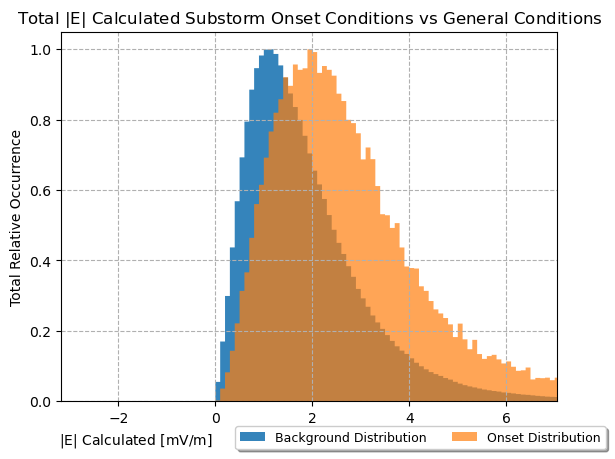

In [41]:
# Go to the section below this if you are including the substorm onset quiet time delay, run the previous section first

# Choose between using the min Welch's test value or the max or min values of your mean, variance, or first derivative as the best delay value
#deriveddelay=max(enumerate(ttest),key=lambda x: x[1])[0]+start
#deriveddelay=min(enumerate(means),key=lambda x: x[1])[0]+start
#deriveddelay=max(enumerate(means),key=lambda x: x[1])[0]+start
#deriveddelay=min(enumerate(meansderivfiltered),key=lambda x: x[1])[0]+start
#deriveddelay=max(enumerate(meansderivfiltered),key=lambda x: x[1])[0]+start
#deriveddelay=min(enumerate(meansderivfiltered),key=lambda x: x[1])[0]+start
#deriveddelay=max(enumerate(meansderivfiltered),key=lambda x: x[1])[0]+start

# Or choose your own time, note again negative means before substorm:
deriveddelay=0

# Also choose the scaling factor of the bins and plot limits
binfactor=10
variancefactor=3

# Change the y axis to log below if need be

paramvalues[paramvalues==0]=np.nan # Some variables that have many points measured at exactly 0 should actually be nan values
paramvalues[paramvalues==np.inf]=np.nan # Same as above but for inf values, usually occur when dividing by 0
paramvalues[paramvalues==999999]=np.nan # Other files may use this as the default for no value

substarttime=[]
for i in range(len(subtrange)):
    substarttime.append(subtrange[i]+60*(deriveddelay+(interval/2))-60*interval)
subindex=bxtimes.searchsorted(substarttime) # Finds the index of each starting time. This is such a neat trick that should be documented more on, greatly reduces calculation time
paramimportant=[]
for i in subindex:
    for j in range(interval):
        paramimportant.append(paramvalues[i+j])
paramimportant=np.array(paramimportant)
paramaverage=[]
paramaverage=np.array(paramaverage)
paramaverage=np.nanmean(paramimportant.reshape(-1,(interval)),axis=1) # Takes the average of each interval # of terms

plt.figure(17)
edge=np.linspace(math.floor(np.nanmin(paramvalues)),math.ceil(np.nanmax(paramvalues)),(math.ceil(np.nanmax(paramvalues))-math.ceil(np.nanmin(paramvalues))+1)*binfactor+1)
counts,bins=np.histogram(paramvalues,bins=edge)
plt.stairs(counts/np.nanmax(counts),bins,fill=True,edgecolor='None',alpha=.9,label='Background Distribution')
counts2,bins2=np.histogram(paramaverage,bins=edge)
plt.stairs(counts2/np.nanmax(counts2),bins2,fill=True,edgecolor='None',alpha=.7,label='Onset Distribution')
plt.legend(loc='upper left')
plt.xlabel(str(paramname)+' ['+str(unitname)+']')
plt.ylabel('Total Relative Occurrence')
plt.title('Total '+str(paramname)+' Substorm Onset Conditions vs General Conditions')
plt.grid(True,linestyle='--')
ax=plt.gca()
ax.set_xlim([-variances[deriveddelay-start]*variancefactor+np.nanmean(paramvalues),variances[deriveddelay-start]*variancefactor+np.nanmean(paramvalues)])
#plt.yscale('log')
ax.xaxis.set_label_coords(.15,-.08)
plt.legend(loc='upper right',bbox_to_anchor=(1.11,-.05),fancybox=True,shadow=True,ncol=5,prop={'size':9})

plt.savefig(datadirectory+str(filename)+str(start)+str(end)+str(interval)+' Histogram.png',dpi=1000)
finalttest=stats.ttest_ind(a=counts[~np.isnan(counts)],b=counts2[~np.isnan(counts2)],equal_var=False)
finaltvalue=np.abs(finalttest.statistic)
finalpvalue=finalttest.pvalue
finalmean=np.nanmean(paramaverage)
finalvariance=np.nanvar(paramaverage)
genmean=np.nanmean(paramvalues)
genvariance=np.nanvar(paramvalues)
print(f' The t value and its associated probability is indicated by {finaltvalue} and {finalpvalue} respectively')
print('Note that this value for t is very different from that above, but the reason for this is that the bin sizes affect the calculation')
print(f' The mean and variance for the onset time are {finalmean} '+str(unitname)+f' and {finalvariance} '+str(unitname)+f'^2 respectively while the background values are {genmean} '+str(unitname)+f' and {genvariance} '+str(unitname)+f' respectively')
# Note that this value for t is very different from that above, but the reason for this is that the bin sizes affect the calculation

22-Oct-24 19:00:53: <>:6: SyntaxWarning: invalid escape sequence '\m'

22-Oct-24 19:00:53: <>:7: SyntaxWarning: invalid escape sequence '\m'

22-Oct-24 19:00:53: <>:68: SyntaxWarning: invalid escape sequence '\m'

22-Oct-24 19:00:53: <>:6: SyntaxWarning: invalid escape sequence '\m'

22-Oct-24 19:00:53: <>:7: SyntaxWarning: invalid escape sequence '\m'

22-Oct-24 19:00:53: <>:68: SyntaxWarning: invalid escape sequence '\m'

22-Oct-24 19:00:53: C:\Users\getma\AppData\Local\Temp\ipykernel_7452\2785434414.py:6: SyntaxWarning: invalid escape sequence '\m'
  paramname='$\mathrm{Calculated\ E_y}$' # The name that the plots are going to display, the $ signs are necessary for formatting, a \ means a space

22-Oct-24 19:00:53: C:\Users\getma\AppData\Local\Temp\ipykernel_7452\2785434414.py:7: SyntaxWarning: invalid escape sequence '\m'
  unitname='$\mathrm{mV/m}$' # The units of the parameter, refer to LaTeX commands for more details on this, example to make fonts italic, remove the \mathrm{} co

The highest Welch's t test value is 44.54324603529976 and occurs at time -120 minutes from substorm onset time
The lowest mean value is -0.17065586 [$\mathrm{mV/m}$] and occurs at time -119 minutes from substorm onset time
The highest mean value is 0.7311331 [$\mathrm{mV/m}$] and occurs at time -4 minutes from substorm onset time
The lowest variance value is 1.5442022 [$\mathrm{mV/m}$] and occurs at time -100^2 minutes from substorm onset time
The highest variance value is 2.3615396 [$\mathrm{mV/m}$] and occurs at time 70^2 minutes from substorm onset time
The lowest change in mean value is -0.004906326830387115 [$\mathrm{mV/m}$] and occurs at time 45 minutes from substorm onset time
The highest change in mean value is 0.008311590108787641 [$\mathrm{mV/m}$] and occurs at time -59 minutes from substorm onset time


<Figure size 640x480 with 0 Axes>

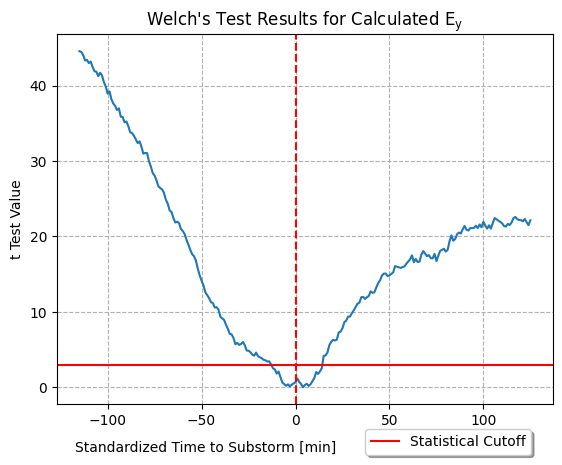

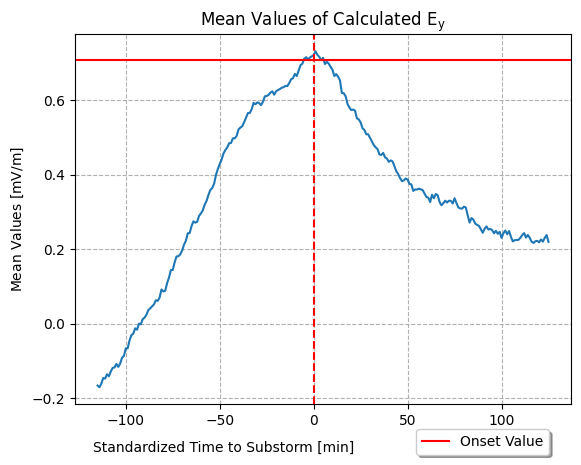

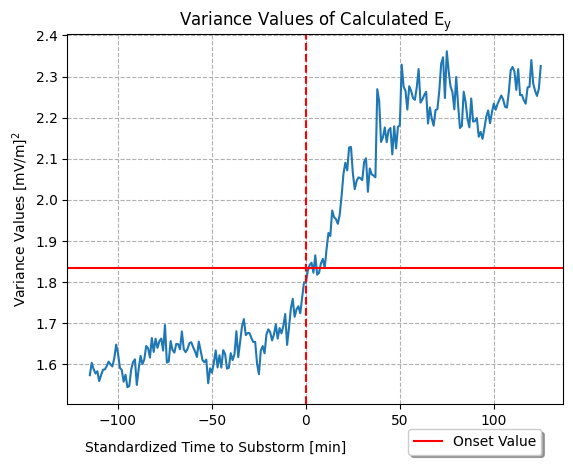

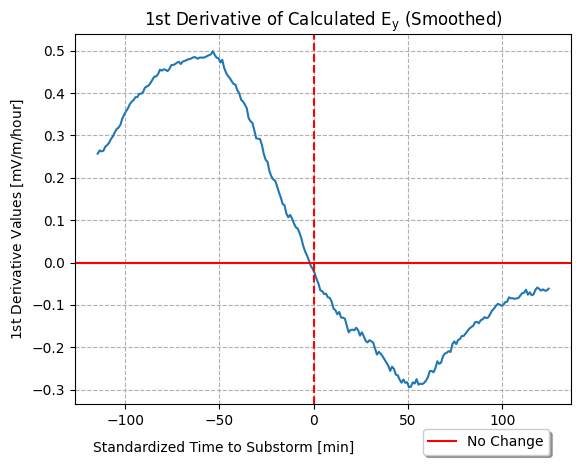

<Figure size 640x480 with 0 Axes>

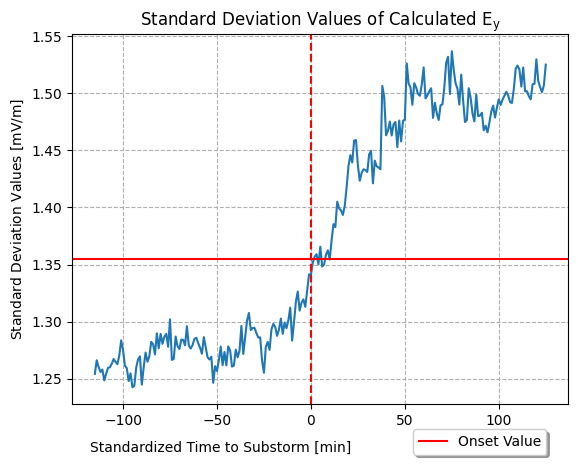

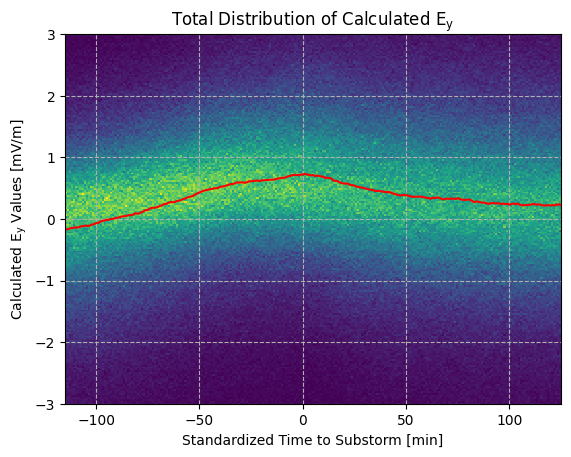

In [10]:
# Go to the section above if you're not including the substorm onset quiet time delay

# Choose which data set to load:
paramvalues=efieldygsecalculatedvalues
filename='efieldygsecalculatedvalues'
paramname='$\mathrm{Calculated\ E_y}$' # The name that the plots are going to display, the $ signs are necessary for formatting, a \ means a space
unitname='$\mathrm{mV/m}$' # The units of the parameter, refer to LaTeX commands for more details on this, example to make fonts italic, remove the \mathrm{} command
start=-120 # Negative means before substorm, values in minutes
end=120
substormcutoff=6*60 # For the minimum time in-between substorms i.e. there must be a period of at least x minutes before an onset event that contains no other onsets
averagestart=-5 # To calculte the total background averages, a range must be given i.e. a range between 60 and 30 minutes before an onset would be -60 and -30
averageend=5
smoothness=100 # Change to help with smoothing function on 1st derivative plot

# If the other tests were used, uncomment the code below
varrange=range(start,end+1)
loadedarrays=np.load(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+'processeddata.npz')
ttest=loadedarrays['arr_0']
tpvalues=loadedarrays['arr_1']
means=loadedarrays['arr_2']
variances=loadedarrays['arr_3'] # Uncomment these as needed
genmean=loadedarrays['arr_4']
genvariance=loadedarrays['arr_5']
importantvalues=loadedarrays['arr_6']
#kstest=loadedarrays['arr_7']
#kspvalues=loadedarrays['arr_8']
#cvtest=loadedarrays['arr_9']
#cvpvalues=loadedarrays['arr_10']
#rstest=loadedarrays['arr_11']
#rspvalues=loadedarrays['arr_12']
#mwtest=loadedarrays['arr_13']
#mwpvalues=loadedarrays['arr_14']

plt.figure(9),
xvar=np.linspace(start,end,len(varrange))
fig,ax=plt.subplots()
ax.plot(xvar+5,ttest)
plt.title('Welch\'s Test Results for '+str(paramname))
plt.xlabel('Standardized Time to Substorm [min]')
plt.ylabel('t Test Value')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
plt.grid(True,linestyle='--')
plt.axvline(x=(averagestart+averageend)/2,color='r',linestyle='--')
plt.axhline(y=3,color='r',linestyle='-',label='Statistical Cutoff')
ax.xaxis.set_label_coords(.3,-.1)
plt.legend(loc='upper right',bbox_to_anchor=(.97,-.05),fancybox=True,shadow=True,ncol=5)
plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Welch Test.png',dpi=1000)

plt.figure(10)
fig,ax=plt.subplots()
ax.plot(xvar+5,means)
plt.title('Mean Values of '+str(paramname))
plt.xlabel('Standardized Time to Substorm [min]')
plt.ylabel('Mean Values ['+str(unitname)+']')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
plt.grid(True,linestyle='--')
plt.axvline(x=(averagestart+averageend)/2,color='r',linestyle='--')
plt.axhline(y=genmean,color='r',linestyle='-',label='Onset Value')
ax.xaxis.set_label_coords(.3,-.1)
plt.legend(loc='upper right',bbox_to_anchor=(.97,-.05),fancybox=True,shadow=True,ncol=5)
plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Mean Test.png',dpi=1000)

plt.figure(11)
fig,ax=plt.subplots()
ax.plot(xvar+5,variances)
plt.title('Variance Values of '+str(paramname))
plt.xlabel('Standardized Time to Substorm [min]')
plt.ylabel('Variance Values ['+str(unitname)+']$\mathrm{^2}$')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
plt.grid(True,linestyle='--')
plt.axvline(x=(averagestart+averageend)/2,color='r',linestyle='--')
plt.axhline(y=genvariance,color='r',linestyle='-',label='Onset Value')
ax.xaxis.set_label_coords(.3,-.1)
plt.legend(loc='upper right',bbox_to_anchor=(.97,-.05),fancybox=True,shadow=True,ncol=5)
plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Variance Test.png',dpi=1000)

plt.figure(12)
fig,ax=plt.subplots()
meansderiv=np.diff(means)
xvarderiv=(np.array(xvar)[:-1]+np.array(xvar)[1:])/2
def smooth(y,boxpts):
    box=np.ones(boxpts)/boxpts
    ysmooth=np.convolve(y,box,mode='same')
    return ysmooth
meansderivfiltered=smooth(meansderiv,smoothness)
ax.plot(xvarderiv+5,meansderivfiltered*60) # Converted to hours
plt.title('1st Derivative of '+str(paramname)+' (Smoothed)')
plt.xlabel('Standardized Time to Substorm [min]')
plt.ylabel('1st Derivative Values ['+str(unitname)+'/hour]')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
plt.grid(True,linestyle='--')
plt.axvline(x=(averagestart+averageend)/2,color='r',linestyle='--')
plt.axhline(y=0,color='r',linestyle='-',label='No Change')
ax.xaxis.set_label_coords(.3,-.1)
plt.legend(loc='upper right',bbox_to_anchor=(.97,-.05),fancybox=True,shadow=True,ncol=5)
plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Derivative Test.png',dpi=1000)

#plt.figure(13)
#fig,ax=plt.subplots()
#ax.plot(xvar+5,kstest)
#plt.title('Kolmogorov-Smirnov Test Results for '+str(paramname))
#plt.xlabel('Standardized Time to Substorm [min]')
#plt.ylabel('Kolmogorov-Smirnov Test Value')
#plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
#plt.grid(True,linestyle='--')
#plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Kolmogorov-Smirnov Test.png',dpi=1000)

#plt.figure(14)
#fig,ax=plt.subplots()
#ax.plot(xvar+5,cvtest)
#plt.title('Cramér-von Mises Test Results for '+str(paramname))
#plt.xlabel('Standardized Time to Substorm [min]')
#plt.ylabel('Cramér-von Mises Test Value')
#plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
#plt.grid(True,linestyle='--')
#plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Cramér-von Mises Test.png',dpi=1000)

#plt.figure(15)
#fig,ax=plt.subplots()
#ax.plot(xvar+5,rstest)
#plt.title('Wilcoxon Signed-Rank Test Results for '+str(paramname))
#plt.xlabel('Standardized Time to Substorm [min]')
#plt.ylabel('Wilcoxon Signed-Rank Test Value')
#plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
#plt.grid(True,linestyle='--')
#plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+'Wilcoxon Signed-Rank Test.png',dpi=1000)

#plt.figure(16)
#fig,ax=plt.subplots()
#ax.plot(xvar+5,mwtest)
#plt.title('Mann-Whitney U Test Results for '+str(paramname))
#plt.xlabel('Standardized Time to Substorm [min]')
#plt.ylabel('Mann-Whitney U Test Value')
#plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
#plt.grid(True,linestyle='--')
#plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Mann-Whitney U Test.png',dpi=1000)

xaxislong=[]
for i in varrange:
    xaxislong.append(i*np.ones(len(importantvalues[0])))
xaxislong=np.array(xaxislong)
xaxislong=np.concatenate((xaxislong),axis=None)
importantvalues=np.array(importantvalues)
importantvalues=np.concatenate((importantvalues),axis=None)
nanindices=np.argwhere(np.isnan(importantvalues))
importantvalues=np.delete(importantvalues,nanindices)
xaxislong=np.delete(xaxislong,nanindices)

plt.figure(18)
stdev=np.sqrt(variances)
genstdev=np.sqrt(genvariance)
fig,ax=plt.subplots()
ax.plot(xvar+5,stdev)
plt.title('Standard Deviation Values of '+str(paramname))
plt.xlabel('Standardized Time to Substorm [min]')
plt.ylabel('Standard Deviation Values ['+str(unitname)+']')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
plt.grid(True,linestyle='--')
plt.axvline(x=(averagestart+averageend)/2,color='r',linestyle='--')
plt.axhline(y=genstdev,color='r',linestyle='-',label='Onset Value')
ax.xaxis.set_label_coords(.3,-.1)
plt.legend(loc='upper right',bbox_to_anchor=(.97,-.05),fancybox=True,shadow=True,ncol=5)
plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' Standard Deviation Test.png',dpi=1000)

plt.figure(19)
fig,ax=plt.subplots()
ax.hist2d(xaxislong+5,importantvalues,bins=(241,2000))
plt.plot(xvar+5,means,'r')
plt.title('Total Distribution of '+str(paramname))
plt.xlabel('Standardized Time to Substorm [min]')
plt.ylabel(str(paramname)+' Values ['+str(unitname)+']')
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
plt.grid(True,linestyle='--')
ax.set_ylim([-3,3]) # This limit may be necessary on specific parameters

plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+' 2D Histogram Plot Test.png',dpi=1000)

maxttest=np.nanmax(ttest)
maxttesttime=max(enumerate(ttest),key=lambda x:x[1])[0]+start
minmean=np.nanmin(means)
minmeantime=min(enumerate(means),key=lambda x:x[1])[0]+start
maxmean=np.nanmax(means)
maxmeantime=max(enumerate(means),key=lambda x:x[1])[0]+start
minvariance=np.nanmin(variances)
minvariancetime=min(enumerate(variances),key=lambda x:x[1])[0]+start
maxvariance=np.nanmax(variances)
maxvariancetime=max(enumerate(variances),key=lambda x:x[1])[0]+start
minmeanderiv=np.nanmin(meansderivfiltered)
minmeanderivtime=min(enumerate(meansderivfiltered),key=lambda x:x[1])[0]+start
maxmeanderiv=np.nanmax(meansderivfiltered)
maxmeanderivtime=max(enumerate(meansderivfiltered),key=lambda x:x[1])[0]+start
print('The highest Welch\'s t test value is '+str(maxttest)+' and occurs at time '+str(maxttesttime)+' minutes from substorm onset time')
print('The lowest mean value is '+str(minmean)+' ['+str(unitname)+'] and occurs at time '+str(minmeantime)+' minutes from substorm onset time')
print('The highest mean value is '+str(maxmean)+' ['+str(unitname)+'] and occurs at time '+str(maxmeantime)+' minutes from substorm onset time')
print('The lowest variance value is '+str(minvariance)+' ['+str(unitname)+'] and occurs at time '+str(minvariancetime)+'^2 minutes from substorm onset time')
print('The highest variance value is '+str(maxvariance)+' ['+str(unitname)+'] and occurs at time '+str(maxvariancetime)+'^2 minutes from substorm onset time')
print('The lowest change in mean value is '+str(minmeanderiv)+' ['+str(unitname)+'] and occurs at time '+str(minmeanderivtime)+' minutes from substorm onset time')
print('The highest change in mean value is '+str(maxmeanderiv)+' ['+str(unitname)+'] and occurs at time '+str(maxmeanderivtime)+' minutes from substorm onset time')

15-May-24 10:18:02: /tmp/ipykernel_445314/2960969159.py:37: RuntimeWarning: Mean of empty slice
  paramvaluesgen=np.nanmean(paramvaluesgen.reshape(-1,(abs(averageend-averagestart)+1)),axis=1) # Takes the average of each time period before a substorm onset



 The t value and its associated probability is indicated by 1.700341375730119 and 0.0898781882302729 respectively
Note that this value for t is very different from that above, but the reason for this is that the bin sizes affect the calculation
 The mean and variance for the onset time are 423.639892578125 $\mathrm{km/s}$ and 6795.9287109375 $\mathrm{km/s}$ respectively while the background values are 425.312744140625 $\mathrm{km/s}$ and 6942.310546875 $\mathrm{km/s}$ respectively


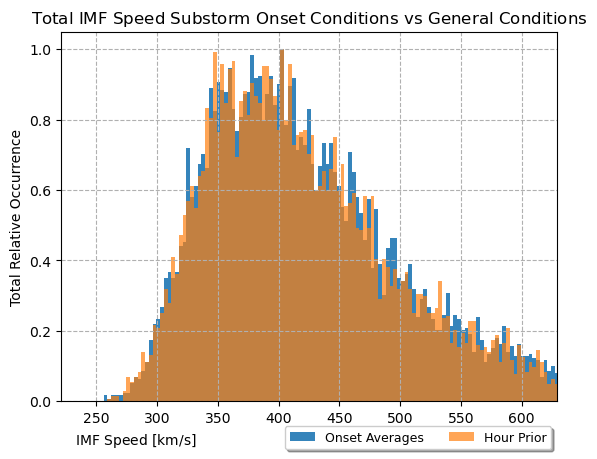

In [60]:
# Go to the section above if you're not including the substorm onset quiet time delay, and run the section before that first

# Choose between using the min Welch's test value or the max or min values of your mean, variance, or first derivative as the best delay value
#deriveddelay=max(enumerate(ttest),key=lambda x: x[1])[0]+start
#deriveddelay=min(enumerate(means),key=lambda x: x[1])[0]+start
#deriveddelay=max(enumerate(means),key=lambda x: x[1])[0]+start
#deriveddelay=min(enumerate(meansderivfiltered),key=lambda x: x[1])[0]+start
#deriveddelay=max(enumerate(meansderivfiltered),key=lambda x: x[1])[0]+start
#deriveddelay=min(enumerate(meansderivfiltered),key=lambda x: x[1])[0]+start
#deriveddelay=max(enumerate(meansderivfiltered),key=lambda x: x[1])[0]+start

# Or choose your own time, note again negative means before substorm:
deriveddelay=-60

# Also choose the scaling factor of the bins and plot limits
binfactor=1
variancefactor=.03

# Change the y axis to log below if need be

paramvalues[paramvalues==0]=np.nan # Some variables that have many points measured at exactly 0 should actually be nan values
paramvalues[paramvalues==np.inf]=np.nan # Same as above but for inf values, usually occur when dividing by 0
paramvalues[paramvalues==999999]=np.nan # Other files may use this as the default for no value

subindex=bxtimes.searchsorted(subtrange) # Finds the index of each starting time. This is such a neat trick that should be documented more on, greatly reduces calculation time
subindex=list(subindex)
for i in reversed(range(len(subindex)-1)):
    if subindex[i]-subindex[i-1]<substormcutoff: # Value again in minutes
        del subindex[i]
subindex=np.concatenate((574,subindex),axis=None) # The first value needs to be replaced here

paramvaluesgen=[]
for i in subindex:
    for j in range(averagestart,averageend+1):
        paramvaluesgen.append(paramvalues[i+j])
paramvaluesgen=np.array(paramvaluesgen)
paramvaluesgen=np.nanmean(paramvaluesgen.reshape(-1,(abs(averageend-averagestart)+1)),axis=1) # Takes the average of each time period before a substorm onset

paramimportant=[]
for i in subindex+deriveddelay:
    paramimportant.append(paramvalues[i+j])

plt.figure(20) #uncomment the code below for most cases
#edge=np.linspace(math.floor(np.nanmin(paramvaluesgen)),math.ceil(np.nanmax(paramvaluesgen)),(math.ceil(np.nanmax(paramvaluesgen))-math.ceil(np.nanmin(paramvaluesgen))+1)*binfactor+1)
edge=np.linspace(math.floor(np.nanmin(paramvaluesgen)),math.ceil(np.nanmax(paramvaluesgen)),200)
counts,bins=np.histogram(paramvaluesgen,bins=edge)
plt.stairs(counts/np.nanmax(counts),bins,fill=True,edgecolor='None',alpha=.9,label='Onset Averages')
counts2,bins2=np.histogram(paramimportant,bins=edge)
plt.stairs(counts2/np.nanmax(counts2),bins2,fill=True,edgecolor='None',alpha=.7,label='Hour Prior')
plt.legend(loc='upper left')
plt.xlabel(str(paramname)+' ['+str(unitname)+']')
plt.ylabel('Total Relative Occurrence')
plt.title('Total '+str(paramname)+' Substorm Onset Conditions vs General Conditions')
plt.grid(True,linestyle='--')
ax=plt.gca()
ax.set_xlim([-variances[deriveddelay-start]*variancefactor+np.nanmean(paramvaluesgen),variances[deriveddelay-start]*variancefactor+np.nanmean(paramvaluesgen)])
#plt.yscale('log')
ax.xaxis.set_label_coords(.15,-.08)
plt.legend(loc='upper right',bbox_to_anchor=(1,-.05),fancybox=True,shadow=True,ncol=5,prop={'size':9})

plt.savefig(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+str(deriveddelay)+' Histogram.png',dpi=1000)
finalttest=stats.ttest_ind(a=counts[~np.isnan(counts)],b=counts2[~np.isnan(counts2)],equal_var=False)
finaltvalue=np.abs(finalttest.statistic)
finalpvalue=finalttest.pvalue
finalmean=np.nanmean(paramimportant)
finalvariance=np.nanvar(paramimportant)
genmean=np.nanmean(paramvaluesgen)
genvariance=np.nanvar(paramvaluesgen)
print(f' The t value and its associated probability is indicated by {finaltvalue} and {finalpvalue} respectively')
print('Note that this value for t is very different from that above, but the reason for this is that the bin sizes affect the calculation')
print(f' The mean and variance for the onset time are {finalmean} '+str(unitname)+f' and {finalvariance} '+str(unitname)+f' respectively while the background values are {genmean} '+str(unitname)+f' and {genvariance} '+str(unitname)+f' respectively')
# Note that this value for t is very different from that above, but the reason for this is that the bin sizes affect the calculation

In [58]:
# Wavelet Analysis:

# Choose which data set to load:
paramvalues=bygsmvalues
filename='bygsmvalues'
paramname='$\mathrm{B_Z\ GSM}$' # The name that the plots are going to display, the $ signs are necessary for formatting, a \ means a space
unitname='$\mathrm{nT}$' # The units of the parameter, refer to LaTeX commands for more details on this, example to make fonts italic, remove the \mathrm{} command
start=-120 # Negative means before substorm, values in minutes
end=0
substormcutoff=6*60 # For the minimum time in-between substorms i.e. there must be a period of at least x minutes before an onset event that contains no other onsets
averagestart=-5 # To calculte the total background averages, a range must be given i.e. a range between 60 and 30 minutes before an onset would be -60 and -30
averageend=5
smoothness=100 # Change to help with smoothing function on 1st derivative plot

# If the other tests were used, uncomment the code below
varrange=range(start,end+1)
loadedarrays=np.load(datadirectory+str(filename)+'start'+str(start)+'end'+str(end)+'nointerval'+str(substormcutoff)+str(averagestart)+str(averageend)+'processeddata.npz')
ttest=loadedarrays['arr_0']
tpvalues=loadedarrays['arr_1']
means=loadedarrays['arr_2']
variances=loadedarrays['arr_3'] # Uncomment these as needed
genmean=loadedarrays['arr_4']
genvariance=loadedarrays['arr_5']
#importantvalues=loadedarrays['arr_6']
#kstest=loadedarrays['arr_7']
#kspvalues=loadedarrays['arr_8']
#cvtest=loadedarrays['arr_9']
#cvpvalues=loadedarrays['arr_10']
#rstest=loadedarrays['arr_11']
#rspvalues=loadedarrays['arr_12']
#mwtest=loadedarrays['arr_13']
#mwpvalues=loadedarrays['arr_14']


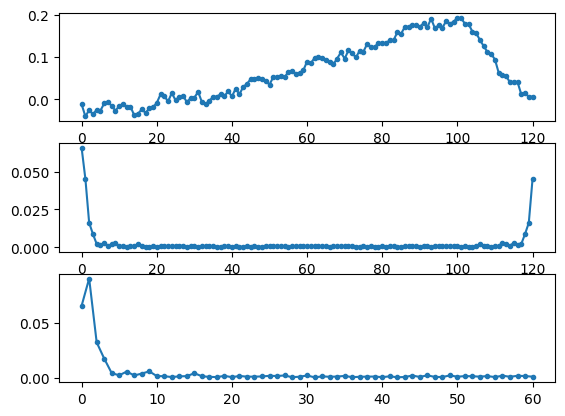

In [59]:
meansfft=np.fft.fft(means)
absmeansfft=np.abs(meansfft)/len(means)
fig,[ax1,ax2,ax3]=plt.subplots(nrows=3,ncols=1)
#xvar=np.linspace(start/60,end/60,len(varrange))
absmeansfftplot=2*absmeansfft[0:int(len(means)/2+1)]
absmeansfftplot[0]=absmeansfftplot[0]/2

ax1.plot(means,'.-')
ax2.plot(absmeansfft,'.-')
ax3.plot(absmeansfftplot,'.-')
#plt.xlabel(str(paramname)+' ['+str(unitname)+']')
#plt.ylabel('Mean Values ['+str(unitname)+']')
#plt.ylabel('Fast Fourier Transform')
#plt.title('Total '+str(paramname)+' Substorm Onset Conditions vs General Conditions')
#ax2.set_xlim([1,119])
#ax2.set_ylim([0,.01])
plt.show()

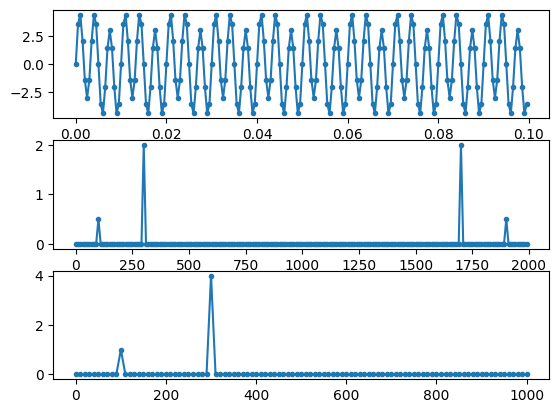

In [49]:
import numpy as np
import matplotlib.pyplot as plt
fs=2000
tstep=1/fs
f0=100
n=int(10*fs/f0)
t=np.linspace(0,(n-1)*tstep,n)
fstep=fs/n
f=np.linspace(0,(n-1)*fstep,n)
#y=3*np.sin(2*np.pi*f0*t)+5*np.cos(10*np.pi*f0*t)
y=1*np.sin(2*np.pi*f0*t) + 4*np.sin(2*np.pi*3*f0*t)
x=np.fft.fft(y)
xmag=np.abs(x)/n

fplot=f[0:int(n/2+1)]
xmagplot=2*xmag[0:int(n/2+1)]
xmagplot[0]=xmagplot[0]/2

fig,[ax1,ax2,ax3]=plt.subplots(nrows=3,ncols=1)
ax1.plot(t,y,'.-')
ax2.plot(f,xmag,'.-')
ax3.plot(fplot,xmagplot,'.-')
plt.show()


